In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

## Decision Trees

The process of asking questions about a dataset, learning about the observations features and thresholds to glean information about the observation you're investigating

### Learning from questions

__Node:__ each question is a node; root nodes are first question, interior nodes are follow up questions, leaf nodes are endpoints

__Branches(or paths):__ the links between nodes

- Each rule divides the data into a subgroups, typically two with binary (yes or no) questions being common

- All data has to have a route or way to flow through the tree, it cannot disappear or remain in the tree

- In essence, a decision tree is simply a series of rules to arrive at a conclusion

### Entropy

Questions do not consist of the same amount of information, some are more relevant than others. Concepts from information theory relevant here are information gain and entropy.

__Entropy:__ analogous to uncertainty, defined using Shannon Entropy H

__Shannon Entropy H:__ the weighted sum of log base 2 of the probabilities of all outcomes

$$H=-\sum_{i=1}^n P(x_i)log_2P(x_i)$$

- As we limit the possible number of outcomes and become more confident in the outcome, entropy decreases

- Zero entropy occurs when the area under the tree only has one possible outcome

- Entropy can be used to measure information gain

__Information gain:__ the change in entropy from the original state to the weighted potential outcomes of the following state

- An efficient decision tree design gains the most information as quickly as possible

In [10]:
#set up data in dataframes
customers = pd.DataFrame()
customers['purchases_amount'] = [105, 65, 89, 99, 149, 102, 34, 120, 129, 39,
                                 20, 30, 109, 40, 55, 100, 23, 20, 70, 10]
customers['purchases_items'] = [1, 4, 5, 4, 7, 1, 2, 10, 6, 5,
                                1, 3, 2, 1, 5, 10, 3, 3, 1, 1]
customers['promo'] = [1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
                      1, 1, 1, 0, 1, 1, 1, 0, 1, 1]
customers['email_list'] = [1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
                           0, 1, 1, 0, 1, 0, 1, 1, 0, 0]
customers['checkouts'] = [1, 5, 3, 3, 1, 2, 4, 4, 1, 1,
                          1, 1, 2, 4, 1, 1, 2, 1, 1, 1]

repeat_customer = pd.DataFrame()
repeat_customer['repeat'] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                             0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

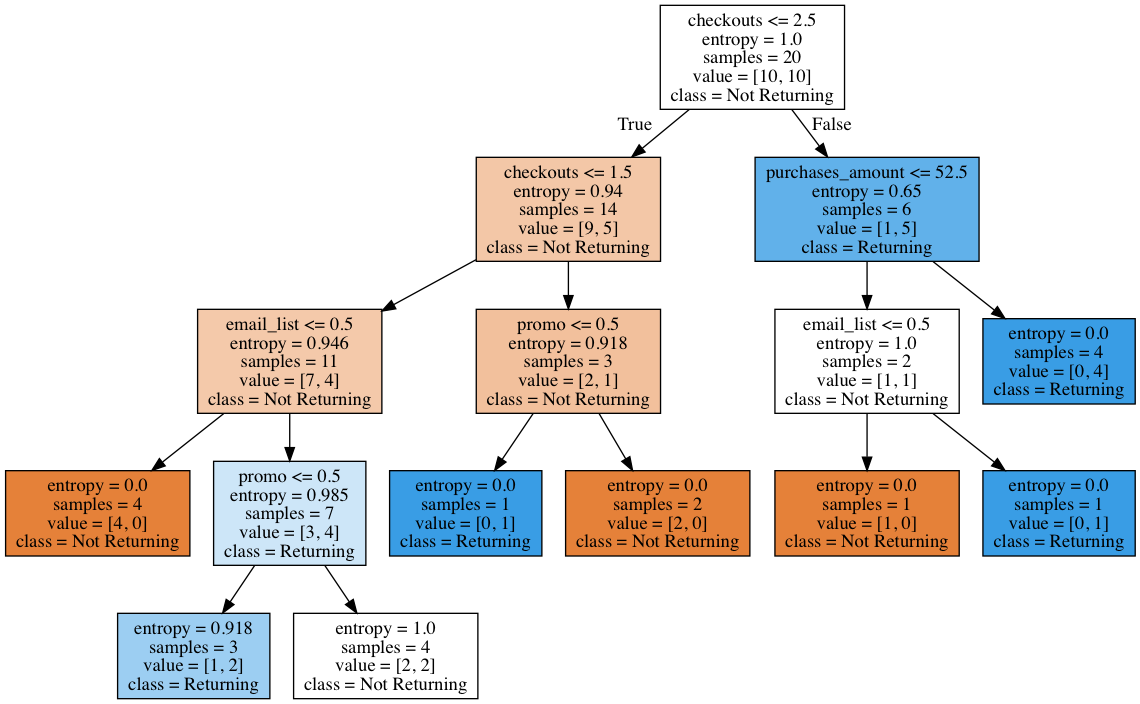

In [11]:
#want to find whether a customer is likely to come back within 30 days

#import model
from sklearn import tree

#convenience for displaying visualizations
from IPython.display import Image

#packages for rendering tree
import pydotplus
import graphviz

#initialize and train tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state=1337
)
decision_tree.fit(customers, repeat_customer)

#render tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning','Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

__Output:__ visualization of our trained tree, for every node it shows the rule being applied, the entropy in the dataset(1 most uncertain, 0 totally certain), samples remaining, distribution of samples, and the dominant class

__Following trees:__ moving down a tree to the left you are meeting the rule, to the right you are outside the rule. For this tree, in branches below the root node, all nodes to the left have checkouts value less than or equal to 2.5, all the nodes to the right have checkouts value that is not less than or equal to 2.5

__Result:__ tree predicts 11 customers not returning, 9 customers returning
- notice how each nodes sample is split between the following binary nodes
- can reach some leaf nodes in fewer branches than other leaf nodes

### Parameters when initializing tree
- criterion='entropy' to use entropy as the method of looking for information gain
- max_features=1 so only one feature will be used per node
- max_depth=4 to set four decision levels below the root node for classification
- random_state=1337 was used just so this tree looks a specific way for this assignment, __don't do this when actually using this model!__

## Reasons to use decision trees
- easy to represent the model visually
- can handle varied types of data
- feature selection is a part of the model
- easy to use with little data preparation

### Downsides to decision trees
- randomness in their generation can lead to variance in estimates, the tree doesn't build the same way every time
- very prone to overfitting especially when grown too deep or complex
- balanced data is needed, since they are working from information gain they are biased towards the dominant class

## Tinker with trees

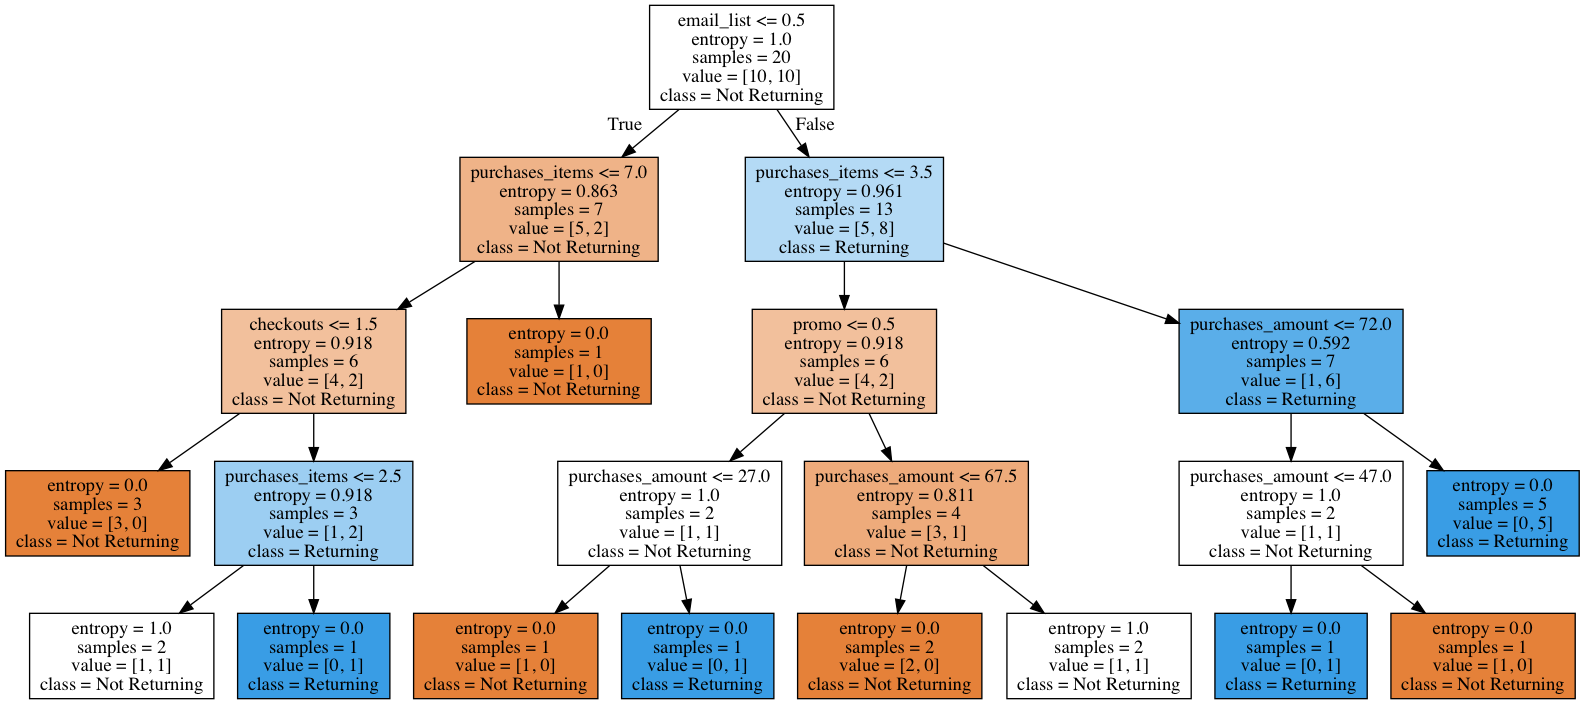

In [4]:
#remove random state argument and re-generate a few trees

#initialize and train tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
)
decision_tree.fit(customers, repeat_customer)

#render tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning','Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Not Returning: 12

Returning: 8

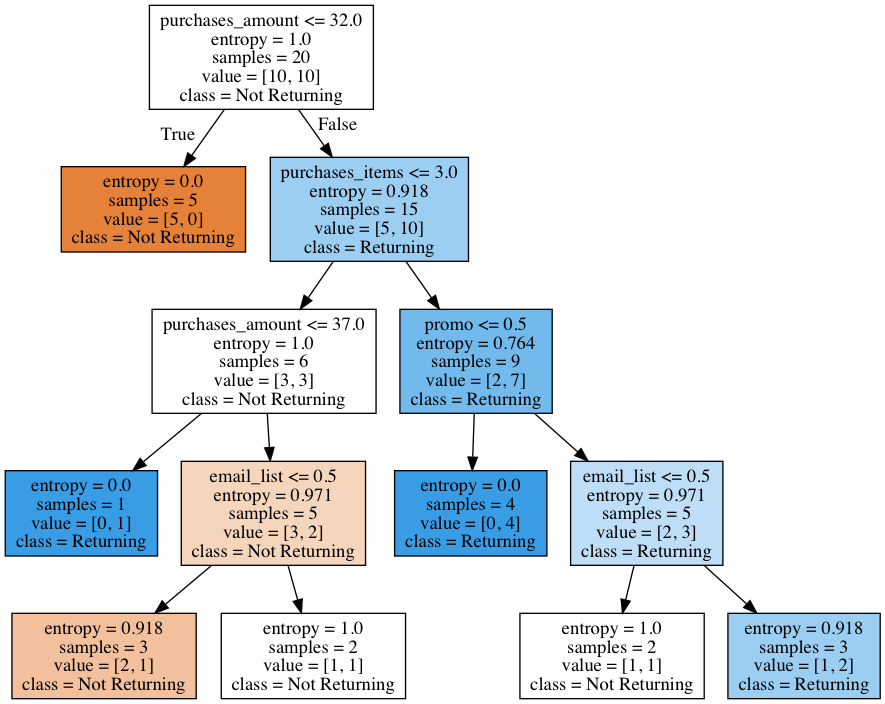

In [5]:
#initialize and train tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
)
decision_tree.fit(customers, repeat_customer)

#render tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning','Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Not Returning: 12 (notice final depth on the right are both classed Not Returning)

Returning: 8

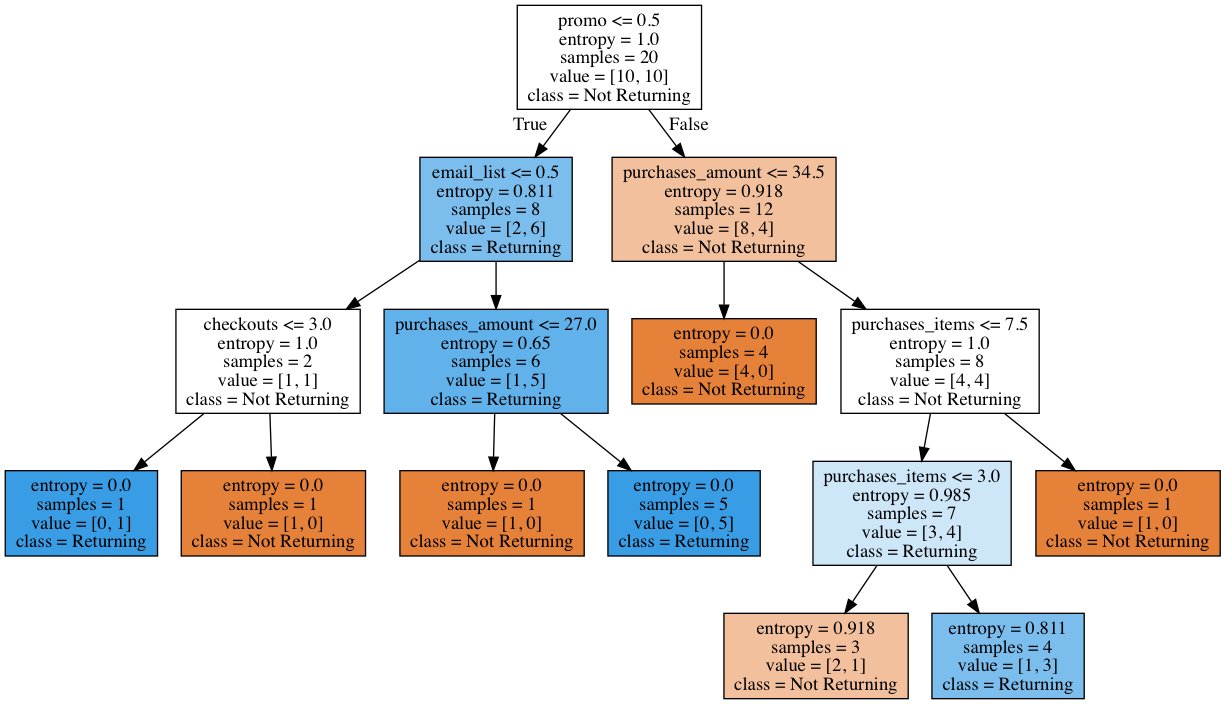

In [6]:
#initialize and train tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
)
decision_tree.fit(customers, repeat_customer)

#render tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning','Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Not Returning: 11

Returning: 9

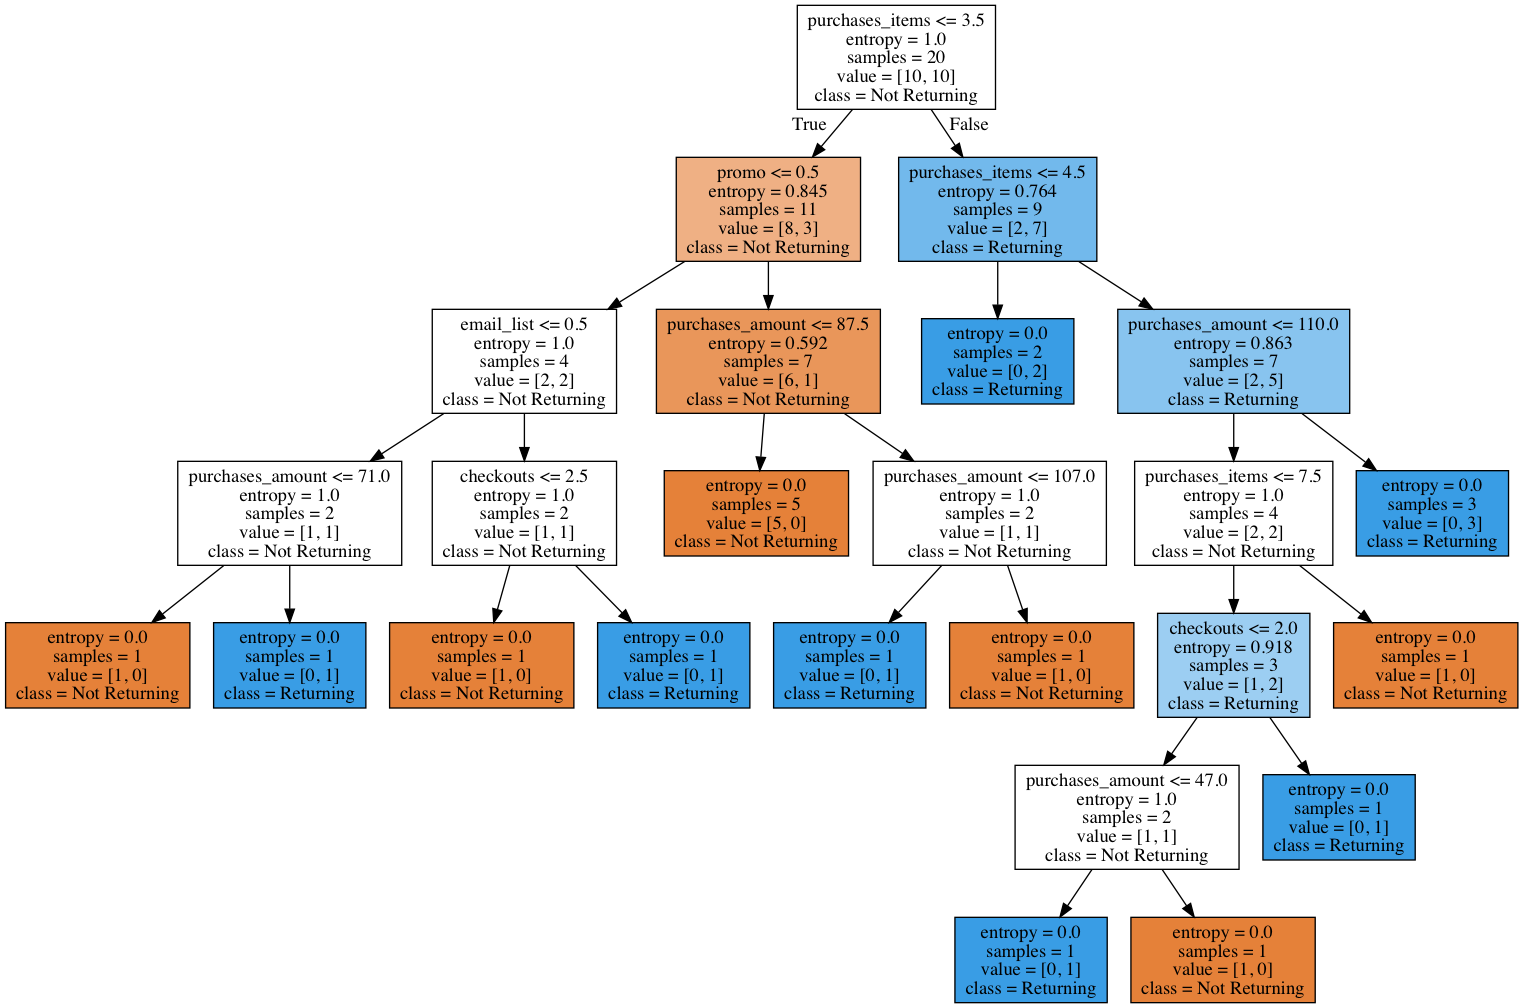

In [7]:
#change max_depth to see how that affects results

#initialize and train tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=6,
)
decision_tree.fit(customers, repeat_customer)

#render tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning','Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

__Depth = 6__

Not Returning: 11

Returning: 9

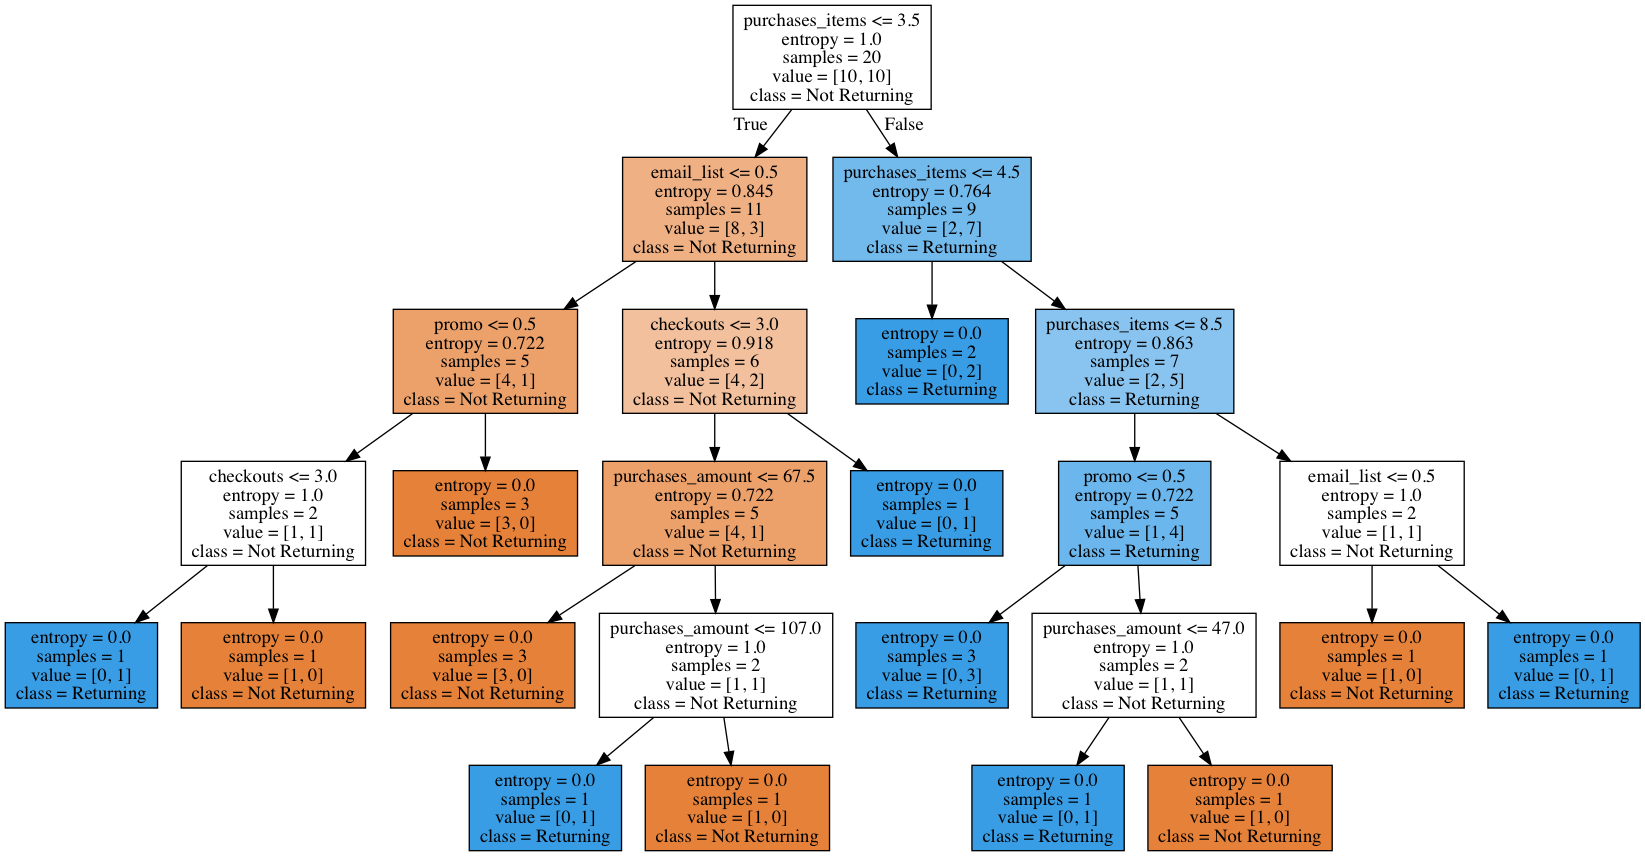

In [8]:
#initialize and train tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=10,
)
decision_tree.fit(customers, repeat_customer)

#render tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning','Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

__Depth = 10__

Not Returning: 10

Returning: 10

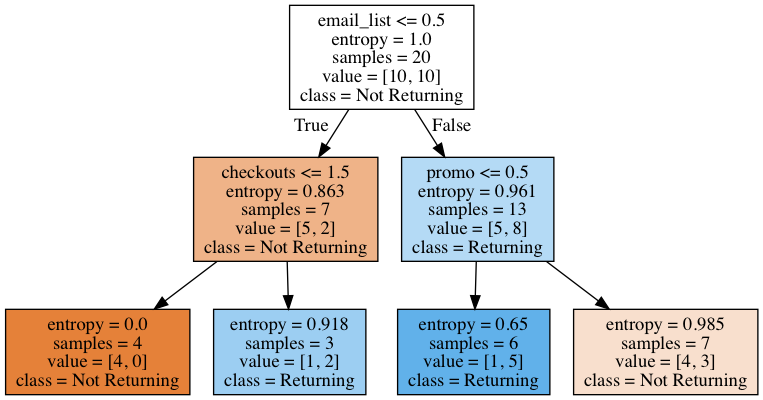

In [9]:
#initialize and train tree
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=2,
)
decision_tree.fit(customers, repeat_customer)

#render tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=customers.columns,
    class_names=['Not Returning','Returning'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

__Depth = 2__

Not Returning: 11

Returning: 9